# Đồ án cuối kì môn Lập trình cho Khoa học Dữ liệu - CQ2022/21

## Mục lục
- [I. Thông tin nhóm](#i)
- [II. Thu thập dữ liệu](#ii)
    - [1. Chủ đề](#ii1)
    - [2. Nguồn dữ liệu](#ii2)
    - [3. Cách thu thập](#ii3)
- [III. Khám phá dữ liệu](#iii)
- [IV. Đặt câu hỏi có ý nghĩa và trả lời](#iv)
    - [1. Câu hỏi 1](#iv1)
        - [a. Tiền xử lý](#iva)
        - [b. Trực quan hóa](#ivb)
        - [c. Kết luận (trả lời câu hỏi)](#ivc)
    - [2. Câu hỏi 2](#iv2)
    - [3. Câu hỏi 3](#iv3)
    - [4. Câu hỏi 4](#iv4)
- [V. Nhận xét quá trình làm đồ án](#v)
    - [1. Thành viên 1](#v1)
    - [2. Thành viên 2](#v2)
    - [3. Thành viên 3](#v3)
    - [4. Ý kiến nhóm](#v4)
- [Tài liệu tham khảo](#tltk)


## I. Thông tin nhóm <a id="i"></a>

| Họ tên                | MSSV              | Công việc | Hoàn thành(%)|
|-----------------------|-------------------|-----------|--------------|
|Nguyễn Tiến Quốc      |   22120300        |           | 100%         |
|Nguyễn Trung Quôc      |   22120301        |           | 100%         |
|Võ Thành Tâm      |   22120324        |           | 100%         |

## II. Thu thập dữ liệu <a id="ii"></a>

### 1. Chủ đề <a id="ii1"></a>

### 2. Nguồn dữ liệu <a id="ii2"></a>

### 3. Cách thu thập <a id="ii3"></a>

## III. Khám phá dữ liệu  <a id="iii"></a>

## IV. Đặt câu hỏi có ý nghĩa và trả lời  <a id="iv"></a>

### 1. Câu hỏi 1 <a id="iv1"></a>

Mỗi đặc trưng ảnh hưởng tới giá cả của laptop như thế nào? Đặc trưng nào trong số đó ảnh hưởng lớn nhất trong việc định giá laptop?
- Lợi ích khi trả lời câu hỏi: Dưới góc độ các doanh nghiệp, các hãng, ta biết được đặc trưng nào khách hàng coi trọng để điều chỉnh sản phẩm cho phù hợp với nhu cầu thị trường. Giúp hiểu rõ yếu tố nào ảnh hưởng mạnh đến giá cả để định giá sản phẩm hợp lí hơn, mang tính cạnh tranh hơn. Ngoài ra giúp các nhà sản xuất tập trung phát triển các đặc trưng mang lại giá trị cao nhất cho khách hàng.
- Cách xử lí: Ta sẽ nhắm vào các cột chứa thông số kĩ thuật, lập ma trận tương quan của các cột đó với giá cả, sử dụng đường xu hướng cho biểu đồ để biết được các thông số kĩ thuật chất lượng càng cao thì giá thay đổi như nào.

#### a. Tiền xử lý <a id="iva"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('./Dataset/laptop_price_cleaned.csv', encoding='Latin-1')
df.head()

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [3]:
# In ra các loại GPU có trong dữ liệu
df['GPU_model'] = df['GPU_model'].str.lower()
gpu = df['GPU_model'].unique()
gpu

array(['iris plus graphics 640', 'hd graphics 6000', 'hd graphics 620',
       'radeon pro 455', 'iris plus graphics 650', 'radeon r5',
       'iris pro graphics', 'geforce mx150', 'uhd graphics 620',
       'hd graphics 520', 'radeon pro 555', 'radeon r5 m430',
       'hd graphics 615', 'radeon pro 560', 'geforce 940mx',
       'hd graphics 400', 'geforce gtx 1050', 'radeon r2', 'radeon 530',
       'geforce 930mx', 'hd graphics', 'hd graphics 500',
       'geforce 930mx ', 'geforce gtx 1060', 'geforce 150mx',
       'iris graphics 540', 'radeon rx 580', 'geforce 920mx',
       'radeon r4 graphics', 'radeon 520', 'geforce gtx 1070',
       'geforce gtx 1050 ti', 'geforce mx130', 'r4 graphics',
       'geforce gtx 940mx', 'radeon rx 560', 'geforce 920m',
       'radeon r7 m445', 'radeon rx 550', 'geforce gtx 1050m',
       'hd graphics 515', 'radeon r5 m420', 'hd graphics 505',
       'gtx 980 sli', 'r17m-m1-70', 'geforce gtx 1080', 'quadro m1200',
       'geforce 920mx ', 'geforce gtx

In [4]:
# In ra các hãng GPU có trong dữ liệu
df['GPU_company'] = df['GPU_company'].str.lower()
gpu = df['GPU_company'].unique()
gpu

array(['intel', 'amd', 'nvidia', 'arm'], dtype=object)

Các Nhóm Phân Loại GPU:

- Intel Graphics: Bao gồm các GPU như iris plus graphics 640, hd graphics 6000, hd graphics 620, iris plus graphics 650, iris pro graphics, uhd graphics 620, hd graphics 520, hd graphics 615, hd graphics 400, hd graphics, hd graphics 500, iris graphics 540, hd graphics 515, hd graphics 505, iris graphics 550, hd graphics 630, hd graphics 510, hd graphics 405, hd graphics 530, graphics 620, hd graphics 540, hd graphics 5300, hd graphics 620.

- Nvidia GeForce High-End: Bao gồm các GPU dòng GeForce cao cấp như geforce gtx 1050, geforce gtx 1060, geforce gtx 1070, geforce gtx 1050 ti, gtx 980 sli, geforce gtx 1080, geforce gtx 980m, geforce gtx 965m, geforce gtx1080, geforce gtx1050 ti, geforce gtx 970m, geforce gtx 1070m, geforce gtx1060, geforce gtx 1050ti, geforce gtx 980.
- Nvidia GeForce Mid/Low-End: Bao gồm các GPU dòng GeForce tầm trung và thấp như geforce mx150, geforce 940mx, geforce 930mx, geforce 930mx, geforce 150mx, geforce 920mx, geforce 920mx, geforce gtx 940mx, geforce 920m, geforce gtx 940mx, geforce 920m, geforce 920mx, geforce gtx 950m, geforce 930m, geforce gtx 940m, geforce gt 940mx, geforce gtx 960m, geforce gtx 960m, geforce gtx 960, geforce 960m, geforce 920, geforce 940m, geforce gtx 930mx, geforce 960m.

- Nvidia Quadro: Bao gồm các GPU dòng Quadro như quadro m1200, quadro m2200m, quadro m620, quadro m620m, quadro m520m, quadro m2200, quadro m2000m, quadro m1000m, quadro 3000m, quadro m500m, quadro m3000m.

- AMD Radeon High-End: Bao gồm các GPU dòng Radeon cao cấp như radeon pro 455, radeon pro 555, radeon pro 560, radeon rx 580, radeon rx 560, radeon rx 550, radeon rx 540, radeon 540.
- AMD Radeon Mid/Low-End: Bao gồm các GPU dòng Radeon tầm trung và thấp như radeon r5, radeon r2, radeon 530, radeon r5 m430, radeon 520, radeon r7 m445, radeon r5 m420, radeon r5 430, radeon r4 graphics, r4 graphics, radeon r4, radeon r7 m460, radeon r5 520, radeon r7 m440, radeon r7, radeon r7 m365x, radeon r9 m385, radeon r5 m330, radeon r5 m315, radeon r7 m360, radeon r5 m420x, radeon r7 graphics, radeon r7 m465, radeon r3.
- AMD FirePro: Bao gồm các GPU dòng FirePro như firepro w4190m, firepro w5130m, firepro w4190m, firepro w6150m.

- ARM Mali: Bao gồm các GPU như mali t860 mp4.

- Other: Bao gồm các GPU không thuộc các nhóm trên hoặc không rõ ràng. (r17m-m1-70)

Phân loại dựa trên: [Phân loại chi tiết card đồ họa](https://hc.com.vn/ords/nnews/card-do-hoa-la-gi)

In [5]:
def extract_gpu_type(gpu_str):
    if pd.isnull(gpu_str):
        return 'Other'
    
    gpu_str_lower = gpu_str.lower()
    
    # Intel Graphics
    intel_keywords = [
        'hd graphics', 'intel iris', 'uhd graphics',
        'iris plus graphics', 'iris pro graphics', 'iris graphics'
    ]
    if any(keyword in gpu_str_lower for keyword in intel_keywords):
        return 'Intel Graphics'
    
    # Nvidia GeForce High-End
    # Dòng GTX 10xx, GTX 16xx, RTX
    geforce_high_end_patterns = [
        r'geforce\s+gtx\s+10\d0',
        r'geforce\s+gtx\s+16\d0',
        r'geforce\s+rtx',
        r'geforce\s+gtx\s+1070m',
        r'geforce\s+gtx\s+1080',
        r'geforce\s+gtx\s+1060',
        r'geforce\s+gtx\s+1050 ti',
        r'geforce\s+gtx\s+1050m',
        r'geforce\s+gtx\s+980',
        r'geforce\s+gtx\s+980m',
        r'geforce\s+gtx\s+970m',
        r'geforce\s+gtx\s+960m',
        r'geforce\s+gtx\s+965m',
        r'geforce\s+gtx\s+1080m'
    ]
    if any(re.search(pattern, gpu_str_lower) for pattern in geforce_high_end_patterns):
        return 'Nvidia GeForce High-End'
    
    # Nvidia GeForce Mid/Low-End
    geforce_mid_low_patterns = [
        r'geforce\s+mx\d{3}',
        r'geforce\s+gt\s+940mx',
        r'geforce\s+gtx\s+930mx',
        r'geforce\s+gtx\s+940m',
        r'geforce\s+gtx\s+950m',
        r'geforce\s+gtx\s+960',
        r'geforce\s+920mx',
        r'geforce\s+920m',
        r'geforce\s+930m',
        r'geforce\s+940m',
        r'geforce\s+920',
        r'geforce\s+930mx',
        r'geforce\s+960m',
        r'geforce\s+940mx',
        r'geforce\s+960'
    ]
    if any(re.search(pattern, gpu_str_lower) for pattern in geforce_mid_low_patterns):
        return 'Nvidia GeForce Mid/Low-End'
    
    # Nvidia Quadro
    if 'quadro' in gpu_str_lower:
        return 'Nvidia Quadro'
    
    # AMD Radeon High-End
    radeon_high_end_patterns = [
        r'radeon\s+rx\s+5\d0',
        r'radeon\s+rx\s+6\d0',
        r'radeon\s+pro\s+455',
        r'radeon\s+pro\s+555',
        r'radeon\s+pro\s+560',
        r'radeon\s+rx\s+580',
        r'radeon\s+rx\s+560',
        r'radeon\s+rx\s+550',
        r'radeon\s+rx\s+540',
        r'radeon\s+540'
    ]
    if any(re.search(pattern, gpu_str_lower) for pattern in radeon_high_end_patterns):
        return 'AMD Radeon High-End'
    
    # AMD Radeon Mid/Low-End
    radeon_mid_low_patterns = [
        r'radeon\s+r5',
        r'radeon\s+r2',
        r'radeon\s+530',
        r'radeon\s+r5\s+m430',
        r'radeon\s+520',
        r'radeon\s+r7\s+m445',
        r'radeon\s+r5\s+m420',
        r'radeon\s+r5\s+430',
        r'radeon\s+r4\s+graphics',
        r'r4\s+graphics',
        r'radeon\s+r4',
        r'radeon\s+r7\s+m460',
        r'radeon\s+r5\s+520',
        r'radeon\s+r7\s+m440',
        r'radeon\s+r7',
        r'radeon\s+r7\s+m365x',
        r'radeon\s+r9\s+m385',
        r'radeon\s+r5\s+m330',
        r'radeon\s+r5\s+m315',
        r'radeon\s+r7\s+m360',
        r'radeon\s+r5\s+m420x',
        r'radeon\s+r7\s+graphics',
        r'radeon\s+r7\s+m465',
        r'radeon\s+r3'
    ]
    if any(re.search(pattern, gpu_str_lower) for pattern in radeon_mid_low_patterns):
        return 'AMD Radeon Mid/Low-End'
    
    # AMD FirePro
    if 'firepro' in gpu_str_lower:
        return 'AMD FirePro'
    
    # ARM Mali
    if 'mali' in gpu_str_lower:
        return 'ARM Mali'
    
    # Other
    return 'Other'

# Áp dụng phân loại vào DataFrame
df['GPU_Type'] = df['GPU_model'].apply(extract_gpu_type)
df['GPU_Type'].value_counts()

GPU_Type
Intel Graphics                703
Nvidia GeForce High-End       216
AMD Radeon Mid/Low-End        152
Nvidia GeForce Mid/Low-End    142
Nvidia Quadro                  30
AMD Radeon High-End            16
Other                           9
AMD FirePro                     5
ARM Mali                        1
Name: count, dtype: int64

Cơ sở để gán điểm số cho từng loại GPU: [Bảng xếp hạng card đồ họa](https://tplab.vn/blogs/chia-se-kien-thuc-hay/bang-xep-hang-card-do-hoa-2023)


1. Nvidia GeForce High-End (Điểm: 4):
- Lý Do: Đây là dòng GPU cao cấp của Nvidia, thường được sử dụng cho gaming, thiết kế đồ họa chuyên sâu, và các ứng dụng yêu cầu hiệu năng cao. Các model như GTX 1070, GTX 1080, RTX Series cung cấp hiệu năng vượt trội.

2. AMD Radeon High-End (Điểm: 4):
- Tương tự như Nvidia GeForce cao cấp, AMD Radeon High-End như RX 5700, RX 6800 cung cấp hiệu năng mạnh mẽ cho gaming và các ứng dụng đồ họa nặng.

3. Nvidia Quadro và AMD FirePro (Điểm: 3):
- Các GPU này được thiết kế chuyên dụng cho công việc đồ họa chuyên sâu, xử lý video, và các ứng dụng CAD/CAM. Chúng cung cấp hiệu năng tốt nhưng không dành cho gaming.

4. Nvidia GeForce Mid/Low-End và AMD Radeon Mid/Low-End (Điểm: 2):
- Các GPU này phù hợp với gaming nhẹ, xử lý đồ họa trung bình và các ứng dụng thông thường. Chúng cung cấp hiệu năng vừa phải với mức giá hợp lý.

5. Intel Graphics (Điểm: 1):
- Đây là GPU tích hợp trong CPU, phù hợp với các tác vụ cơ bản như lướt web, xem video, và công việc văn phòng. Hiệu năng thấp hơn so với các GPU rời.

6. ARM Mali (Điểm: 0.5):
- GPU này thường được sử dụng trong các thiết bị di động như tablet và smartphone. Hiệu năng thấp, không phù hợp với các tác vụ đồ họa nặng.

7. Other (Điểm: 1):
- Bao gồm các GPU không thuộc các nhóm trên hoặc không rõ ràng. Được gán điểm số mặc định là 1.

In [6]:
# Hàm đánh giá điểm số GPU
def gpu_rank(gpu_type):
    gpu_type_lower = gpu_type.lower()
    
    if 'geforce high-end' in gpu_type_lower or 'radeon high-end' in gpu_type_lower:
        return 4  # GPU cao cấp, hiệu năng cao
    elif 'geforce mid/low-end' in gpu_type_lower or 'radeon mid/low-end' in gpu_type_lower:
        return 2  # GPU trung bình/thấp, hiệu năng vừa
    elif 'quadro' in gpu_type_lower or 'firepro' in gpu_type_lower:
        return 3  # GPU chuyên dụng cho công việc đồ họa, hiệu năng tốt
    elif 'intel graphics' in gpu_type_lower:
        return 1  # GPU tích hợp, hiệu năng thấp
    elif 'arm mali' in gpu_type_lower:
        return 0.5  # GPU ARM, thường dùng trong thiết bị di động, hiệu năng thấp
    else:
        return 1  # Default
df['GPU_Rank'] = df['GPU_Type'].apply(gpu_rank)
df.head()

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Screen,ScreenW,...,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,GPU_Type,GPU_Rank
0,Apple,MacBook Pro,Ultrabook,13,8,macOS,1.37,1339.69,Standard,2560,...,2.3,Core i5,128,0,SSD,No,intel,iris plus graphics 640,Intel Graphics,1.0
1,Apple,Macbook Air,Ultrabook,13,8,macOS,1.34,898.94,Standard,1440,...,1.8,Core i5,128,0,Flash Storage,No,intel,hd graphics 6000,Intel Graphics,1.0
2,HP,250 G6,Notebook,15,8,No OS,1.86,575.00,Full HD,1920,...,2.5,Core i5 7200U,256,0,SSD,No,intel,hd graphics 620,Intel Graphics,1.0
3,Apple,MacBook Pro,Ultrabook,15,16,macOS,1.83,2537.45,Standard,2880,...,2.7,Core i7,512,0,SSD,No,amd,radeon pro 455,AMD Radeon High-End,4.0
4,Apple,MacBook Pro,Ultrabook,13,8,macOS,1.37,1803.60,Standard,2560,...,3.1,Core i5,256,0,SSD,No,intel,iris plus graphics 650,Intel Graphics,1.0


In [7]:
# In ra các loại CPU có trong dữ liệu
df['CPU_model'] = df['CPU_model'].str.lower()
cpu = df['CPU_model'].unique()
cpu

array(['core i5', 'core i5 7200u', 'core i7', 'a9-series 9420',
       'core i7 8550u', 'core i5 8250u', 'core i3 6006u', 'core m m3',
       'core i7 7500u', 'core i3 7100u', 'atom x5-z8350',
       'core i5 7300hq', 'e-series e2-9000e', 'core i7 8650u',
       'atom x5-z8300', 'e-series e2-6110', 'a6-series 9220',
       'celeron dual core n3350', 'core i3 7130u', 'core i7 7700hq',
       'ryzen 1700', 'pentium quad core n4200', 'atom x5-z8550',
       'celeron dual core n3060', 'fx 9830p', 'core i7 7560u',
       'e-series 6110', 'core i5 6200u', 'core m 6y75', 'core i5 7500u',
       'core i7 6920hq', 'core i5 7y54', 'core i7 7820hk',
       'xeon e3-1505m v6', 'core i7 6500u', 'e-series 9000e',
       'a10-series a10-9620p', 'a6-series a6-9220', 'core i7 6600u',
       'celeron dual core 3205u', 'core i7 7820hq', 'a10-series 9600p',
       'core i7 7600u', 'a8-series 7410', 'celeron dual core 3855u',
       'pentium quad core n3710', 'a12-series 9720p', 'core i5 7300u',
       'ce

Các nhóm phân loại CPU:

Cho Intel: 

[Phân loại Intel](https://www.intel.vn/content/www/vn/vi/ark.html#@Processors)

- intel core i7: bao gồm các cpu như core i7, core i7 8550u, core i7 7500u, core i7 8650u, core i7 7700hq, core i7 7560u, core i7 6500u, core i7 6600u, core i7 7600u, core i7 6820hq, core i7 7y75, core i7 7660u, core i7 6700hq, core i7 6820hk, core i7 6560u, core i7 7820hk, core i7 7820hq
- intel core i5: bao gồm các cpu như core i5, core i5 7200u, core i5 8250u, core i5 7300hq, core i5 6200u, core i5 7500u, core i5 6300u, core i5 7440hq, core i5 7y54, core i5 7y57, core i5 6300hq, core i5 6260u, core i5 7300u, core i5 6440hq
- intel core i3: bao gồm các cpu như core i3, core i3 6006u, core i3 7100u, core i3 7130u, core i3 6100u
- intel core m: bao gồm các cpu như core m m3, core m m3-7y30, core m m3-6y30, core m m7-6y75, core m 6y75, core m 7y30, core m 6y54
- intel xeon: bao gồm các cpu như xeon e3 1505m v6, xeon e3 1535m v6, xeon e3 1535m v5
- intel pentium: bao gồm các cpu như pentium dual core n4200, pentium dual core 4405u, pentium dual core 4405y, pentium quad core n4200, pentium quad core n3710, pentium quad core n3450, pentium quad core n3700
- intel celeron: bao gồm các cpu như celeron dual core n3350, celeron dual core n3060, celeron dual core 3205u, celeron dual core 3855u, celeron quad core n3160, celeron dual core n3050
- intel atom: bao gồm các cpu như atom x5 z8350, atom x5 z8300, atom x5 z8550, atom z8350

Cho Amd: 

[Phân loại Amd](https://www.amd.com/en/products/specifications/processors.html)

- amd ryzen: bao gồm các cpu như ryzen 1700, ryzen 1600
- amd a-series: bao gồm các cpu như a4 series 7210, a6 series 9220, a6 series 7310, a8 series 7410, a9 series 9420, a9 series a9 9420, a9 series 9410, a10 series a10 9620p, a10 series 9600p, a12 series 9720p, a12 series 9700p
- amd e-series: bao gồm các cpu như e2 9000e, e2 6110, e2 9000, e2 7110
- amd fx-series: bao gồm các cpu như fx 8800p, fx 9830p

[Tài liệu về Samsung Cortex](https://www.mouser.vn/c/embedded-solutions/computing/single-board-computers/?core=ARM%20Cortex%20A53%2C%20ARM%20Cortex%20A72&srsltid=AfmBOoqkmUafG8LKM4Inn0Tzj16lLpAZpEBshspxxGZmg9wU-LMk_cTh)
- samsung cortex: bao gồm các cpu như cortex a72&a53
- other: bao gồm các cpu không thuộc các nhóm trên hoặc không rõ ràng

Mục Tiêu:
- Phân loại các loại CPU từ dataset thành các nhóm chính.

In [8]:
def extract_cpu_type(cpu_str):
    if pd.isnull(cpu_str):
        return 'unknown'
    
    cpu_str_lower = cpu_str.lower()
    
    # intel core i7
    if 'core i7' in cpu_str_lower:
        return 'intel core i7'
    # intel core i5
    elif 'core i5' in cpu_str_lower:
        return 'intel core i5'
    # intel core i3
    elif 'core i3' in cpu_str_lower:
        return 'intel core i3'
    # intel core m
    elif 'core m' in cpu_str_lower:
        return 'intel core m'
    # intel xeon
    elif 'xeon' in cpu_str_lower:
        return 'intel xeon'
    # intel pentium
    elif 'pentium' in cpu_str_lower:
        return 'intel pentium'
    # intel celeron
    elif 'celeron' in cpu_str_lower:
        return 'intel celeron'
    # intel atom
    elif 'atom' in cpu_str_lower:
        return 'intel atom'
    # amd ryzen
    elif 'ryzen' in cpu_str_lower:
        return 'amd ryzen'
    # amd a-series
    elif re.search(r'a\d+-series', cpu_str_lower):
        return 'amd a-series'
    # amd e-series
    elif re.search(r'e\d+-series', cpu_str_lower):
        return 'amd e-series'
    # amd fx-series
    elif 'fx' in cpu_str_lower:
        return 'amd fx-series'
    # samsung cortex
    elif 'cortex' in cpu_str_lower:
        return 'samsung cortex'
    else:
        return 'other'
    
df['CPU_Type'] = df['CPU_model'].apply(extract_cpu_type)
df['CPU_Type'].value_counts()

CPU_Type
intel core i7     514
intel core i5     423
intel core i3     134
intel celeron      78
amd a-series       45
intel pentium      30
intel core m       17
intel atom         13
other               9
amd ryzen           4
intel xeon          4
amd fx-series       2
samsung cortex      1
Name: count, dtype: int64

Chuyển đổi loại CPU thành điểm số

Mục Tiêu:
- Phân loại các loại CPU từ dataset thành các nhóm chính.
- Gán điểm số tương ứng cho mỗi loại CPU để đánh giá hiệu năng.
- Đảm bảo rằng tất cả các loại CPU trong danh sách đều được xử lý một cách hợp lý.

Các Nhóm Phân Loại CPU và Điểm Số Đề Xuất:

| Nhóm CPU                | Điểm Số |
|-------------------------|---------|
| intel core i3           | 1       |
| intel core i5           | 2       |
| intel core i7           | 3       |
| intel xeon              | 4       |
| intel pentium           | 0.6     |
| intel celeron           | 0.3     |
| intel atom              | 0.5     |
| intel core m            | 1       |
| amd a-series            | 1       |
| amd e-series            | 1       |
| amd fx-series           | 1       |
| amd ryzen               | 3       |
| samsung cortex          | 0.5     |
| khác (other)            | 1       |

Điểm số đề xuất dựa vào các cơ sở sau:
- Intel Core M: Dòng CPU này thường được sử dụng trong các thiết bị nhẹ, có hiệu năng vừa phải.
- AMD FirePro: Dòng GPU chuyên dụng của AMD, tương đương với hiệu năng cao hơn so với các dòng A-Series.
- Samsung Cortex: GPU ARM, thường dùng trong các thiết bị di động, hiệu năng thấp hơn so với CPU x86.
- Khác (Other): Các loại CPU không thuộc các nhóm trên hoặc không rõ ràng.

In [9]:
# Hàm đánh giá điểm số CPU
def cpu_rank(cpu_type):
    cpu_type_lower = cpu_type.lower()
    
    if 'intel xeon' in cpu_type_lower:
        return 4
    elif 'intel core i7' in cpu_type_lower:
        return 3
    elif 'intel core i5' in cpu_type_lower:
        return 2
    elif 'intel core i3' in cpu_type_lower:
        return 1
    elif 'intel core m' in cpu_type_lower:
        return 1
    elif 'intel pentium' in cpu_type_lower:
        return 0.6
    elif 'intel atom' in cpu_type_lower:
        return 0.5
    elif 'intel celeron' in cpu_type_lower:
        return 0.3

    elif 'amd ryzen' in cpu_type_lower:
        return 3
    elif 'amd a-series' in cpu_type_lower:
        return 1
    elif 'amd e-series' in cpu_type_lower:
        return 1
    elif 'amd fx-series' in cpu_type_lower:
        return 1

    elif 'samsung cortex' in cpu_type_lower:
        return 0.5
    else:
        return 1  # Default

df['CPU_Rank'] = df['CPU_Type'].apply(cpu_rank)
df.head()

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Screen,ScreenW,...,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,GPU_Type,GPU_Rank,CPU_Type,CPU_Rank
0,Apple,MacBook Pro,Ultrabook,13,8,macOS,1.37,1339.69,Standard,2560,...,128,0,SSD,No,intel,iris plus graphics 640,Intel Graphics,1.0,intel core i5,2.0
1,Apple,Macbook Air,Ultrabook,13,8,macOS,1.34,898.94,Standard,1440,...,128,0,Flash Storage,No,intel,hd graphics 6000,Intel Graphics,1.0,intel core i5,2.0
2,HP,250 G6,Notebook,15,8,No OS,1.86,575.00,Full HD,1920,...,256,0,SSD,No,intel,hd graphics 620,Intel Graphics,1.0,intel core i5,2.0
3,Apple,MacBook Pro,Ultrabook,15,16,macOS,1.83,2537.45,Standard,2880,...,512,0,SSD,No,amd,radeon pro 455,AMD Radeon High-End,4.0,intel core i7,3.0
4,Apple,MacBook Pro,Ultrabook,13,8,macOS,1.37,1803.60,Standard,2560,...,256,0,SSD,No,intel,iris plus graphics 650,Intel Graphics,1.0,intel core i5,2.0


In [10]:
df.dtypes

Company                  object
Product                  object
TypeName                 object
Inches                    int64
Ram                       int64
OpSys                    object
Weight                  float64
Price_euros             float64
Screen                   object
ScreenW                   int64
ScreenH                   int64
Touchscreen              object
IPSpanel                 object
RetinaDisplay            object
CPU_company              object
CPU_freq                float64
CPU_model                object
PrimaryStorage            int64
SecondaryStorage          int64
PrimaryStorageType       object
SecondaryStorageType     object
GPU_company              object
GPU_model                object
GPU_Type                 object
GPU_Rank                float64
CPU_Type                 object
CPU_Rank                float64
dtype: object

#### b. Trực quan hóa <a id="ivb"></a>

Tìm ra những đặc trưng ảnh hưởng tới giá cả của laptop

| Phân Loại            | Cột Dữ Liệu                                                                                                      |
|----------------------|------------------------------------------------------------------------------------------------------------------|
| Cấu Hình             | Inches, Ram, OS, Weight, Screen, ScreenW, ScreenH, CPU_company, CPU_freq, CPU_model, PrimaryStorage, SecondaryStorage, PrimaryStorageType, SecondaryStorageType, GPU_company, GPU_model |
| Các Tính Năng Bổ Sung | Touchscreen, IPSpanel, RetinaDisplay                                                                             |

Trong cấu hình, chỉ lập biểu đồ tương quen giữa các cột 'Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH', 'CPU_freq', 'CPU_Rank', 'PrimaryStorage', 'SecondaryStorage', 'GPU_Rank' với 'Price_euros' vì các cột này mang giá trị số 

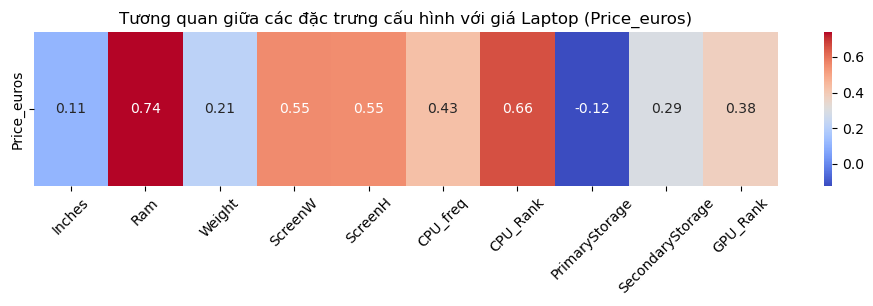

In [11]:
corr_matrix = df[['Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH', 
                 'CPU_freq', 'CPU_Rank', 'PrimaryStorage', 
                 'SecondaryStorage', 'GPU_Rank', 'Price_euros']].corr()
price_corr = corr_matrix[['Price_euros']].drop('Price_euros')  # Loại bỏ tương quan tự với chính nó
plt.figure(figsize=(12, 2))
sns.heatmap(price_corr.T, annot=True, cmap='coolwarm', cbar=True)
plt.xticks(rotation=45)
plt.title('Tương quan giữa các đặc trưng cấu hình với giá Laptop (Price_euros)')
plt.show()

Nhận xét:

- Inches, Weight, SecondaryStorage: Kích thước màn hình, trọng lượng máy và bộ nhớ lưu trữ phụ có mối tương quan dương nhẹ với giá laptop, nghĩa là các yếu tố này gần như không ảnh hưởng nhiều đến giá cả.
- PrimaryStorage: Dung lượng lưu trữ chính có mối tương quan âm nhẹ với giá laptop.
- Ram: Dung lượng RAM có mối tương quan dương mạnh với giá laptop, dung lượng RAM càng cao giá càng cao.
- ScreenW và ScreenH: Độ phân giải màn hình (chiều rộng và chiều cao) có mối tương quan dương mạnh với giá laptop.
- CPU_freq: Tần số CPU có mối tương quan tương đối với giá laptop, CPU có tần số cao hơn thường có giá cao hơn.
- CPU_Rank: Xếp hạng theo các loại CPU có mối tương quan dương mạnh với giá laptop, CPU cao cấp hơn thường đi kèm giá cao hơn.
- GPU_Rank: Xếp hạng theo các loại GPU có mối tương quan dương đáng kể với giá laptop, GPU đời càng mới giá càng cao.

Nhìn chung, các đặc trưng như RAM, CPU_freq, CPU_Rank, và GPU_Rank, độ phân giải màn hình ảnh hưởng lớn đến giá laptop.

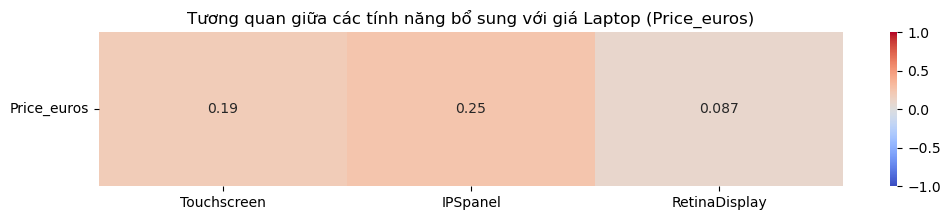

In [12]:
# Chuyển giá trị YES/NO sang 1/0 của 3 cột Touchscreen, IPSpanel, RetinaDisplay
df['Touchscreen'] = df['Touchscreen'].map({'Yes': 1, 'No': 0})
df['IPSpanel'] = df['IPSpanel'].map({'Yes': 1, 'No': 0})
df['RetinaDisplay'] = df['RetinaDisplay'].map({'Yes': 1, 'No': 0})

corr_matrix = df[['Touchscreen', 'IPSpanel', 'RetinaDisplay', 'Price_euros']].corr()
price_corr = corr_matrix[['Price_euros']].drop('Price_euros')
plt.figure(figsize=(12, 2))
sns.heatmap(price_corr.T, annot=True, cmap='coolwarm', cbar=True, vmin=-1, vmax=1)
plt.title('Tương quan giữa các tính năng bổ sung với giá Laptop (Price_euros)')
plt.yticks(rotation=0)
plt.show()

Nhận xét:

- Touchscreen, IPS, và RetinaDisplay tương quan dương yếu với giá laptop. Như vậy đồng nghĩa Các tính năng bổ sung này hầu như không ảnh hưởng nhiều đến giá laptop.

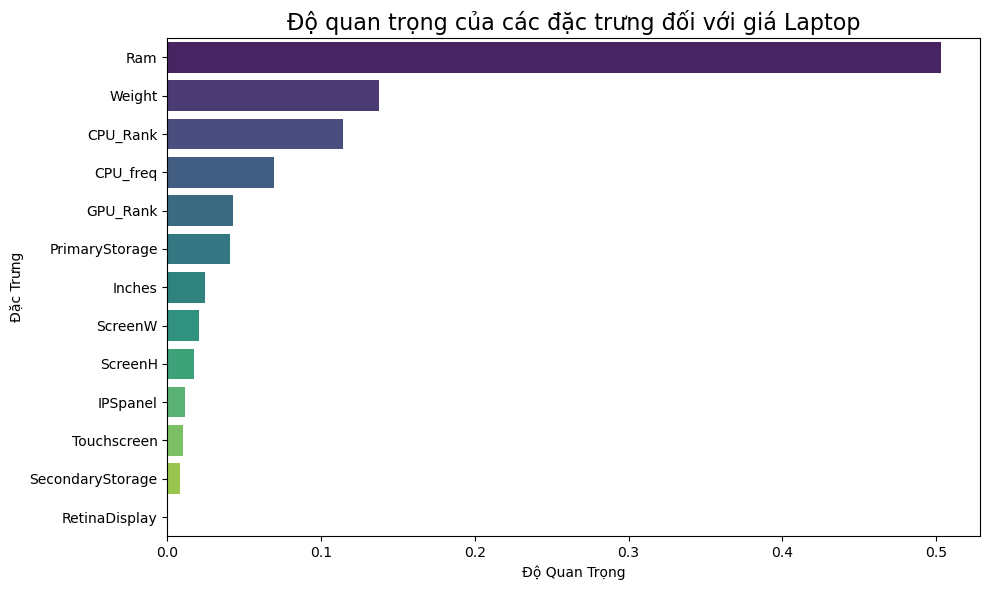

In [13]:
from sklearn.ensemble import RandomForestRegressor

# Chọn các đặc trưng cần thiết
features = ['Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH', 'CPU_freq', 'CPU_Rank', 'PrimaryStorage', 'SecondaryStorage', 'GPU_Rank', 'Touchscreen', 'IPSpanel', 'RetinaDisplay']
X = df[features]
y = df['Price_euros']

# Khởi tạo và huấn luyện mô hình
model = RandomForestRegressor(random_state=42)
model.fit(X, y)
importances = model.feature_importances_

# Tạo DataFrame cho feature importances để dễ dàng vẽ
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Biểu đồ độ quan trọng của từng đặc trưng
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importances,
    hue='Feature',
    palette='viridis',
    dodge=False
)
plt.title('Độ quan trọng của các đặc trưng đối với giá Laptop', fontsize=16)
plt.xlabel('Độ Quan Trọng')
plt.ylabel('Đặc Trưng')
plt.legend([], [], frameon=False)  # Ẩn legend
plt.tight_layout()
plt.show()

Nhận xét:

- RAM có tầm ảnh hưởng lớn nhất đến giá laptop. Dung lượng RAM càng cao thường gắn với hiệu năng càng cao, giá cả cũng cao hơn.
- CPU_Rank cũng ảnh hưởng lớn đến giá laptop. CPU cao cấp hơn thường có giá thành cao hơn. 
- Weight đứng ở vị trí quan trọng thứ ba. Có thể hiểu rằng laptop nhẹ thường đắt hơn vì tính di động và vật liệu cao cấp.
- Các đặc trưng như CPU_freq và GPU_Rank cũng góp phần quan trọng trong việc phản ánh laptop có hiệu năng cao trong xử lý và đồ họa sẽ ảnh hưởng đến giá.

Biểu đồ cho thấy rõ sự ưu tiên về cấu hình (RAM, CPU, GPU) và trọng lượng đối với giá laptop. Những yếu tố phụ trợ như màn hình cảm ứng, độ phân giải, hoặc lưu trữ phụ đóng vai trò bổ trợ chứ không phải là yếu tố quyết định lớn. Đồng thời điều này cũng gợi ý rằng các nhà sản xuất và người tiêu dùng thường tập trung vào hiệu năng cốt lõi trước khi xem xét các tính năng bổ sung.

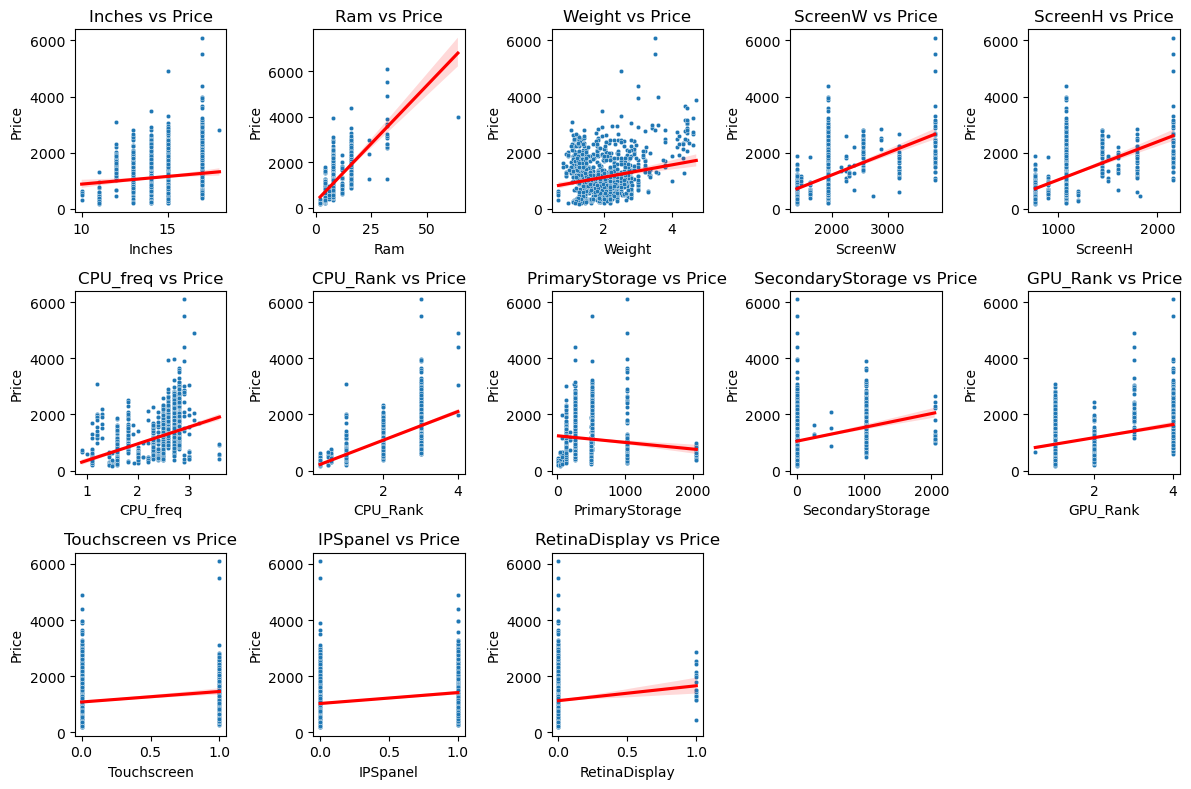

In [14]:
# Scatter plot cho từng đặc trưng với cột Price_euros
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(3, 5, i + 1)
    sns.scatterplot(data=df, x=feature, y='Price_euros', s=10)
    # thêm đường xu hướng tuyến tính
    sns.regplot(data=df, x=feature, y='Price_euros', scatter=False, color='red')
    plt.title(f'{feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()

Nhận xét:

Những đặc trưng có ảnh hưởng rất lớn đến giá:
- RAM: Mối quan hệ tuyến tính rõ ràng. Dung lượng RAM càng cao, giá laptop càng tăng đáng kể.
- CPU_Rank: Các loại CPU có xếp hạng càng cao càng có tác động lớn đến giá. Laptop sử dụng CPU cao cấp sẽ có giá cao hơn rõ rệt.
- GPU_Rank: Tương tự các loại GPU có xếp hạng càng cao càng đóng vai trò quan trọng, đặc biệt trong các laptop phục vụ cho công việc đồ họa hoặc gaming.

Những đặc trưng có ảnh hưởng tương đối:
- CPU_freq: Tần số CPU có ảnh hưởng đến giá nhưng ở mức độ trung bình.
- Weight (Trọng lượng): Laptop nhẹ hơn thường có xu hướng đắt hơn, nhưng mối quan hệ không mạnh và bị phân tán dữ liệu.
- PrimaryStorage và SecondaryStorage: Dung lượng lưu trữ lớn hơn thường làm tăng giá, nhưng không phải yếu tố quyết định.


Những đặc trưng có ảnh hưởng nhẹ hoặc hầu như không ảnh hưởng:
- Inches (Kích thước màn hình), ScreenW và ScreenH (Độ phân giải màn hình): Có ảnh hưởng nhỏ đến giá, thể hiện qua mối quan hệ tuyến tính yếu.
- Touchscreen (Màn hình cảm ứng): Màn hình cảm ứng có tác động rất nhỏ đến giá, chỉ tạo ra sự khác biệt trong một số phân khúc cao cấp.
- IPSpanel (Tấm nền IPS): Tác động nhẹ, chủ yếu ở phân khúc tập trung vào chất lượng hiển thị hình ảnh.
- RetinaDisplay: Ảnh hưởng không đáng kể đến giá, thường xuất hiện trên các sản phẩm của Apple hoặc dòng cao cấp.

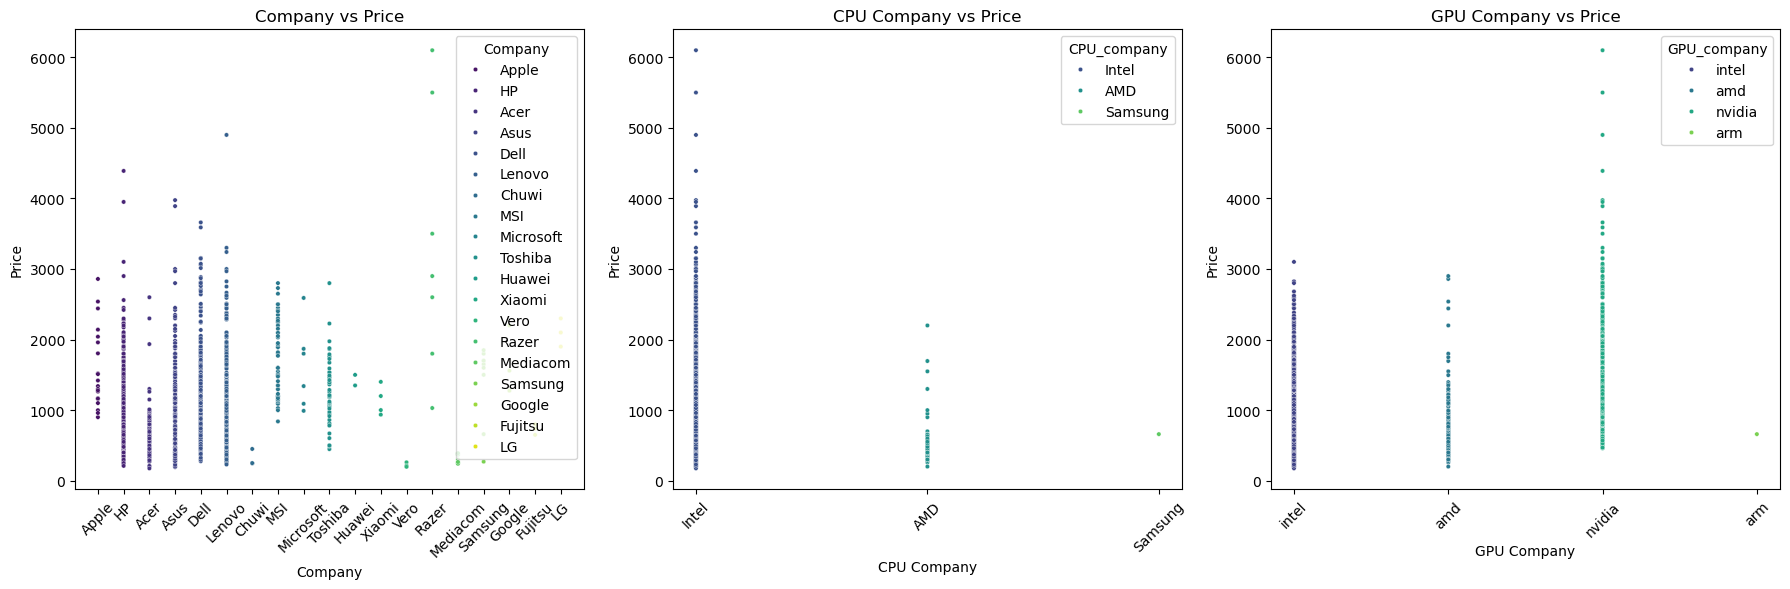

In [15]:
# Vẽ scatter plot giữa các hãng (Company), Hãng CPU (CPU_Company), Hãng GPU(GPU_Company) với giá (Price_euros) để thấy sự phân bố các hãng theo từng mức giá
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='Company', y='Price_euros', hue='Company', palette='viridis', s=10)
plt.title('Company vs Price')
plt.xlabel('Company')
plt.ylabel('Price')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='CPU_company', y='Price_euros', hue='CPU_company', palette='viridis', s=10)
plt.title('CPU Company vs Price')
plt.xlabel('CPU Company')
plt.ylabel('Price')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='GPU_company', y='Price_euros', hue='GPU_company', palette='viridis', s=10)
plt.title('GPU Company vs Price')
plt.xlabel('GPU Company')
plt.ylabel('Price')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Company vs Price:
- Apple: Có mức giá cao nhất trong các hãng, với phần lớn sản phẩm nằm ở phân khúc giá trên 2000 euros.
- Các hãng khác như HP, Dell, Asus, Acer, Lenovo: Phân khúc giá trải dài từ thấp đến trung bình, thường tập trung trong khoảng dưới 2000 euros.
Đây là các hãng phổ biến với nhiều dòng sản phẩm phù hợp các mức giá khác nhau.
- Các hãng như Razer, MSI, và Samsung: Có một số sản phẩm ở phân khúc giá cao, thường gắn liền với laptop gaming hoặc dòng sản phẩm cao cấp.
- Hãng giá thấp còn lại Chuwi, Mediacom: Chủ yếu tập trung ở mức giá thấp dưới 1000 euros, phù hợp với người dùng tìm kiếm laptop giá rẻ.

Nhận xét tổng quan: Hãng laptop ảnh hưởng đáng kể đến giá cả, với Apple dẫn đầu về giá trị thương hiệu và chiến lược sản phẩm cao cấp.

CPU Company vs Price:
- Intel: Các sản phẩm sử dụng CPU Intel chiếm phần lớn dữ liệu, với mức giá trải dài từ thấp đến cao, đặc biệt là các sản phẩm cao cấp trên 4000 euros.
- AMD: Laptop sử dụng CPU AMD có mức giá chủ yếu nằm trong phân khúc trung bình, từ khoảng 500 đến 2000 euros.
- Samsung: Số lượng laptop sử dụng CPU Samsung rất ít, và mức giá chủ yếu ở phân khúc thấp.

Nhận xét tổng quan: Hãng CPU có tác động tương đối đến giá, với Intel phổ biến ở các dòng cao cấp, trong khi AMD tập trung vào phân khúc trung bình.

GPU Company vs Price:
- Nvidia: Các sản phẩm sử dụng GPU Nvidia chiếm phần lớn ở phân khúc giá cao, từ 2000 đến 6000 euros.
- Intel: Laptop dùng GPU Intel phổ biến trong phân khúc giá trung bình, chủ yếu dưới 2000 euros.
- AMD: GPU của AMD xuất hiện ở cả phân khúc trung bình và cao cấp, nhưng ít phổ biến hơn Nvidia.
- ARM: Laptop dùng GPU ARM rất ít, nằm ở phân khúc giá thấp, phản ánh sự tập trung vào các thiết bị tiết kiệm năng lượng.

Nhận xét tổng quan: Nvidia chiếm ưu thế trong phân khúc giá cao, trong khi Intel tập trung vào các sản phẩm phổ thông. AMD ở giữa, với một số dòng cạnh tranh ở cả phân khúc trung bình và cao cấp.

In [16]:
# Giá trị cao nhất và thấp nhất theo Company
price_by_company = df.groupby('Company')['Price_euros'].agg(['min', 'max'])
print("Giá cao nhất và thấp nhất theo Company:")
print(price_by_company)

# Giá trị cao nhất và thấp nhất theo CPU_company
price_by_cpu = df.groupby('CPU_company')['Price_euros'].agg(['min', 'max'])
print("\nGiá cao nhất và thấp nhất theo CPU_company:")
print(price_by_cpu)

# Giá trị cao nhất và thấp nhất theo GPU_company
price_by_gpu = df.groupby('GPU_company')['Price_euros'].agg(['min', 'max'])
print("\nGiá cao nhất và thấp nhất theo GPU_company:")
print(price_by_gpu)

Giá cao nhất và thấp nhất theo Company:
               min      max
Company                    
Acer        174.00  2599.00
Apple       898.94  2858.00
Asus        191.90  3975.00
Chuwi       244.99   449.00
Dell        274.90  3659.40
Fujitsu     649.00   799.00
Google     1275.00  2199.00
HP          209.00  4389.00
Huawei     1349.00  1499.00
LG         1899.00  2299.00
Lenovo      229.00  4899.00
MSI         839.00  2799.00
Mediacom    239.00   389.00
Microsoft   989.00  2589.00
Razer      1029.00  6099.00
Samsung     269.00  1849.00
Toshiba     447.00  2799.00
Vero        196.00   260.00
Xiaomi      935.00  1399.95

Giá cao nhất và thấp nhất theo CPU_company:
               min     max
CPU_company               
AMD          199.0  2199.0
Intel        174.0  6099.0
Samsung      659.0   659.0

Giá cao nhất và thấp nhất theo GPU_company:
               min     max
GPU_company               
amd          199.0  2899.0
arm          659.0   659.0
intel        174.0  3100.0
nvidia      

Gom nhóm theo các hãng, hãng CPU, hãng GPU rồi tính mức giá trung bình để thấy rõ liệu 3 đặc trưng đó có ảnh hưởng đến giá cả hay không

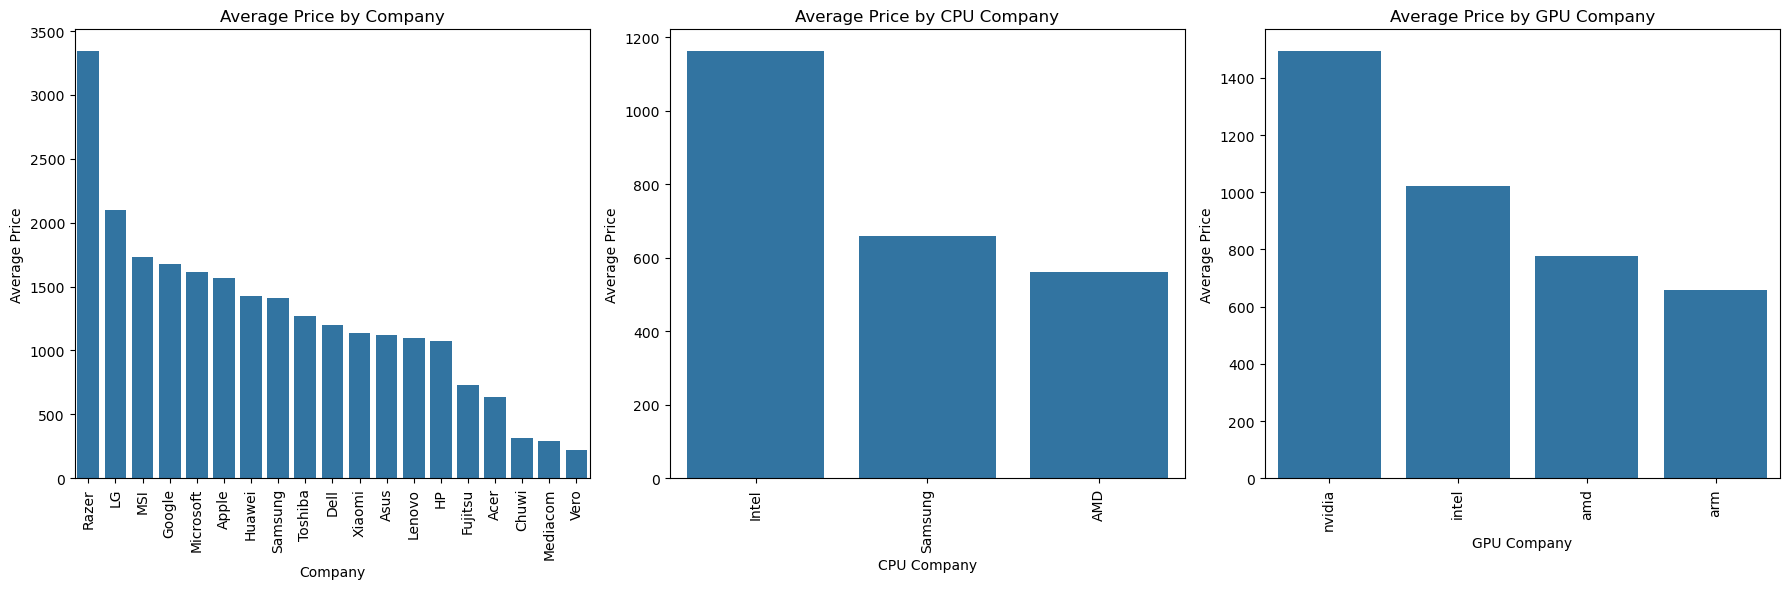

In [17]:
# Gom nhóm theo các hãng, hãng CPU, hãng GPU và tính giá trung bình
company_price = df.groupby('Company')['Price_euros'].mean().sort_values(ascending=False)
cpu_company_price = df.groupby('CPU_company')['Price_euros'].mean().sort_values(ascending=False)
gpu_company_price = df.groupby('GPU_company')['Price_euros'].mean().sort_values(ascending=False)

# Vẽ biểu đồ cột giá trung bình của các hãng, hãng CPU, hãng GPU
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.barplot(x=company_price.index, y=company_price.values)
plt.title('Average Price by Company')
plt.xlabel('Company')
plt.ylabel('Average Price')
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
sns.barplot(x=cpu_company_price.index, y=cpu_company_price.values)
plt.title('Average Price by CPU Company')
plt.xlabel('CPU Company')
plt.ylabel('Average Price')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
sns.barplot(x=gpu_company_price.index, y=gpu_company_price.values)
plt.title('Average Price by GPU Company')
plt.xlabel('GPU Company')
plt.ylabel('Average Price')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Nhận xét:

Giá trung bình theo hãng sản xuất:
- Razer có giá trung bình cao nhất, vượt xa các hãng khác, phản ánh chiến lược tập trung vào laptop gaming cao cấp.
- Các hãng như LG, MSI, Google có giá trung bình cao, chủ yếu phục vụ các phân khúc cao cấp hoặc chuyên biệt.
- Các hãng phổ thông như Acer, HP, Asus, Lenovo có giá trung bình thấp hơn, phục vụ cho nhiều đối tượng khách hàng.
- Chuwi, Mediacom, Vero có giá thấp nhất, phù hợp với phân khúc laptop giá rẻ.

Giá trung bình theo hãng CPU:
- Intel dẫn đầu với giá trung bình cao nhất, thể hiện sự phổ biến trong các dòng laptop cao cấp.
- Samsung có giá trung bình khá cao, nhưng ít sản phẩm.
- AMD có giá trung bình thấp nhất, phản ánh chiến lược hiệu năng tốt với giá hợp lý.

Giá trung bình theo hãng GPU:
- Nvidia có giá trung bình cao nhất, nhấn mạnh vị thế trong phân khúc gaming và đồ họa chuyên nghiệp.
- Intel nằm ở mức trung bình, phổ biến trong các laptop phổ thông với GPU tích hợp.
- AMD và ARM có giá thấp hơn, phù hợp với các phân khúc trung bình hoặc tiết kiệm năng lượng.

#### c. Kết luận (trả lời câu hỏi) <a id="ivc"></a>
**1. Mỗi đặc trưng ảnh hưởng đến giá laptop như thế nào?**

Đặc trưng ảnh hưởng rất lớn:
- RAM: Có mối tương quan dương mạnh nhất và là yếu tố quan trọng nhất trong việc định giá laptop, vì dung lượng RAM cao cải thiện hiệu năng trực tiếp.
- CPU_Rank: Xếp hạng CPU có ảnh hưởng lớn đến giá, phản ánh sức mạnh và khả năng xử lý của CPU.
- GPU_Rank: Xếp hạng GPU cũng đóng vai trò quan trọng, đặc biệt trong các dòng laptop cao cấp phục vụ đồ họa hoặc gaming.
- ScreenW và ScreenH: Độ phân giải màn hình có ảnh hưởng mạnh, đặc biệt đối với các laptop cao cấp.

Đặc trưng ảnh hưởng vừa phải:
- CPU_freq: Tần số CPU có mối quan hệ tuyến tính tương đối với giá, nhưng tác động không lớn bằng RAM hay CPU_Rank.
- Weight (Trọng lượng): Laptop nhẹ hơn thường có giá cao hơn, do vật liệu và thiết kế, nhưng ảnh hưởng không quá mạnh.
- PrimaryStorage và SecondaryStorage: Dung lượng lưu trữ càng lớn lớn giá cũng càng tăng, nhưng không phải yếu tố chính quyết định.

Đặc trưng ảnh hưởng nhẹ hoặc không đáng kể:
- Touchscreen, IPS, RetinaDisplay: Các tính năng bổ sung này tạo sự khác biệt nhỏ trong giá, chủ yếu tập trung ở phân khúc cao cấp.
- Inches, SecondaryStorage: Có tác động yếu, chỉ ảnh hưởng nhẹ đến giá laptop.

Hãng sản xuất laptop:
- Hãng sản xuất có tác động đáng kể, với các thương hiệu cao cấp như Apple, Razer dẫn đầu về giá, trong khi các hãng phổ thông như Acer, Lenovo tập trung vào phân khúc giá thấp hơn.

Hãng CPU:
- Intel phổ biến trong các laptop cao cấp, trong khi AMD tập trung vào phân khúc trung bình với giá hợp lý.

Hãng GPU:
- Nvidia chiếm ưu thế ở phân khúc giá cao, còn Intel phổ biến ở dòng phổ thông, với AMD đứng ở giữa.

**2. Đặc trưng nào ảnh hưởng lớn nhất trong việc định giá laptop?**
- RAM là đặc trưng ảnh hưởng lớn nhất, vì nó liên quan trực tiếp đến hiệu năng của laptop, thể hiện rõ ràng qua cả mô hình huấn luyện và phân tích tương quan.
- Tiếp theo là CPU_Rank và GPU_Rank, hai yếu tố này ảnh hưởng đáng kể do quyết định hiệu suất xử lý và khả năng đồ họa.
- Các yếu tố khác như độ phân giải màn hình (ScreenW, ScreenH) và trọng lượng (Weight) cũng đóng vai trò quan trọng nhưng ở mức độ thấp hơn so với RAM, CPU, và GPU.

### 2. Câu hỏi 2 <a id="iv2"></a>

### 3. Câu hỏi 3 <a id="iv3"></a>

### 4. Câu hỏi 4 (bonus) <a id="iv4"></a>

## V. Nhận xét quá trình làm đồ án  <a id="v"></a>

### 1. Thành viên 1  <a id="v1"></a>

Thành viên Nguyễn Tiến Quốc:

Khó khăn:
- Không có nhiều kiến thức chuyên sâu về laptop, cấu hình laptop nên khi làm việc với bộ dữ liệu này tiếp cận hơi chậm
- Có nhiều ý tưởng nhưng phần lớn ý tưởng rất khó triển khai

Những điều học được:
- Có thêm nhiều hiểu biết về laptop
- Học được cách trình bày một bài làm có đầu tư
- Hiểu biết thêm về ý nghĩa của việc sử dụng biểu đồ để giải quyết vấn đề

### 2. Thành viên 2  <a id="v2"></a>

### 3. Thành viên 3  <a id="v3"></a>

### 4. Ý kiến nhóm  <a id="v4"></a>

Nếu có thêm thời gian thì làm gì?

- Tự cào dữ liệu trên các trang web để có được bộ dữ liệu ưng ý, tự quyết định việc chọn lọc để lấy các cột, đặc trưng theo nhu cầu phân tích của nhóm. Ngoài ra số dòng của bộ dữ liệu này còn quá ít, ở một số hãng CPU như samsung cortex chỉ có 1 sản phẩm,... -> giảm hiệu quả trực quan.
- Huấn luyện và sử dụng thêm các mô hình dự đoán phục vụ cho việc tiếp cận nhiều đối tượng người dùng
- Trong câu hỏi 1, thực hiện xếp hạng chính xác và khách quan hơn cho các nhóm CPU và GPU (dựa vào các nguồn uy tín phổ biến hơn)

## Tài liệu tham khảo  <a id="tltk"></a>